In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
import numpy as np
import matplotlib.pyplot as plt
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
model_params_dir = "/Users/yhhan/temp3"

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n_zero = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Zero.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001,
    model_params_dir=model_params_dir
)

n_normal1 = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Normal.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001,
    model_params_dir=model_params_dir
)

n_normal2 = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001,
    model_params_dir=model_params_dir
)

n_xavier = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Xavier.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001,
    model_params_dir=model_params_dir
)

n_he = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.He.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001,
    model_params_dir=model_params_dir
)

Multi Layer Network Model - ID: TFM6N0YP
Multi Layer Network Model - ID: 2MO2EUOI
Multi Layer Network Model - ID: DDXPOOCZ
Multi Layer Network Model - ID: VJG23P0P
Multi Layer Network Model - ID: AQ5XX02G


In [3]:
data = mnist.MNIST_Data()
#data = mnist.Fashion_MNIST_Data()

In [4]:
batch_size = 1000
max_epoch = 150

neural_networks = {"zero": n_zero, "normal1": n_normal1, "normal2": n_normal2, "xavier": n_xavier, "he": n_he}

for key, neural_network in neural_networks.items():
    print("***" + key + "***")
    neural_network.learning(
        max_epoch=max_epoch, 
        data=data, 
        batch_size=batch_size, 
        print_period=10, 
        is_numba=True, 
        verbose=False
    )

***zero***
-- Learning Started --
Epoch   0 Completed - Train Error: 2.302585 - Validation Error: 2.302585 - Test Accuracy: 0.098000
Save Params at Epoch: 0
Save Params at Epoch: 1
Save Params at Epoch: 2
Save Params at Epoch: 3
Save Params at Epoch: 4
Save Params at Epoch: 5
Save Params at Epoch: 6
Save Params at Epoch: 7
Save Params at Epoch: 8
Save Params at Epoch: 9
Epoch  10 Completed - Train Error: 2.302672 - Validation Error: 2.300884 - Test Accuracy: 0.113500
Save Params at Epoch: 10
Save Params at Epoch: 11
Save Params at Epoch: 12
Save Params at Epoch: 13
Save Params at Epoch: 14
Save Params at Epoch: 15
Save Params at Epoch: 16
Save Params at Epoch: 17
Save Params at Epoch: 18
Save Params at Epoch: 19
Epoch  20 Completed - Train Error: 2.299773 - Validation Error: 2.300883 - Test Accuracy: 0.113500
Save Params at Epoch: 20
Save Params at Epoch: 21
Save Params at Epoch: 22
Save Params at Epoch: 23
Save Params at Epoch: 24
Save Params at Epoch: 25
Save Params at Epoch: 26
Save

/Users/yhhan/git/aiclass/0.Professor/tensorflux/layers.py:99: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (u_value <= 0.0)


Epoch 150 Completed - Train Error:     nan - Validation Error:     nan - Test Accuracy: 0.098000

[Best Epoch (based on Validation Error) and Its Performance]
Epoch 141 Completed - Train Error: 0.063916 - Validation Error:     nan - Test Accuracy: 0.966200
Load Params from Epoch: 141
Params are set to the best model!!!
-- Learning Finished --



In [5]:
for key, neural_network in neural_networks.items():
    print("{:10s} - Epoch:{:3d}, Min Train Error: {:7.5f}, Min ValidationError: {:7.5f}, Max Test Accuracy: {:7.5f}".format(
        key, 
        neural_networks[key].min_validation_error_epoch,
        neural_networks[key].min_train_error,
        neural_networks[key].min_validation_error,
        neural_networks[key].max_test_accuracy,
        )
    )

zero       - Epoch:150, Min Train Error: 2.30045, Min ValidationError: 2.30088, Max Test Accuracy: 0.11350
normal1    - Epoch:  9, Min Train Error: 0.02887, Min ValidationError: 0.08226, Max Test Accuracy: 0.97620
normal2    - Epoch:  8, Min Train Error: 0.04473, Min ValidationError: 0.08915, Max Test Accuracy: 0.97570
xavier     - Epoch: 45, Min Train Error: 0.00031, Min ValidationError: 0.22597, Max Test Accuracy: 0.96480
he         - Epoch:141, Min Train Error: 0.06392, Min ValidationError:     nan, Max Test Accuracy: 0.96620


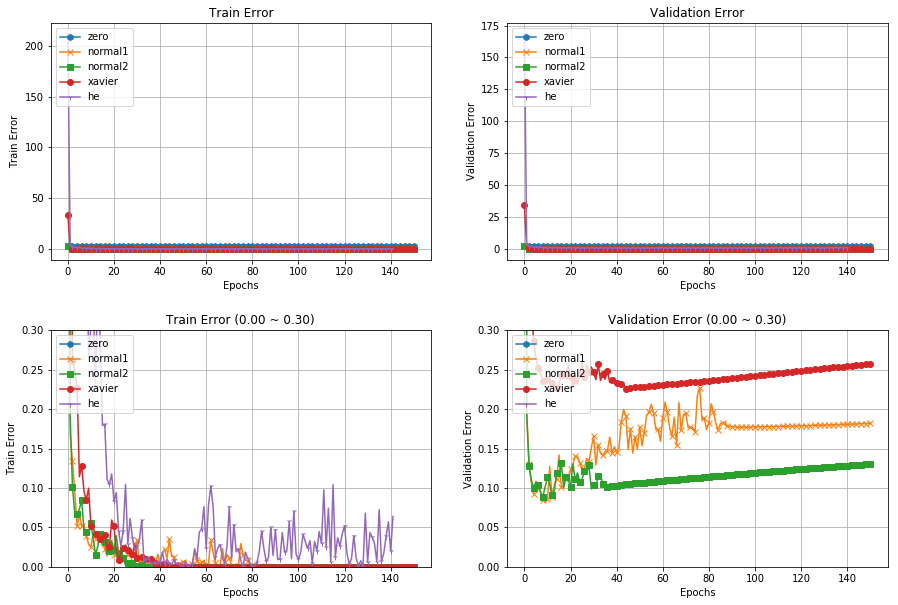

In [6]:
markers = {"zero": "h", "normal1": "x", "normal2": "s", "xavier": "o", "he": "1"}

epoch_list = np.arange(max_epoch + 1)

f, axarr = plt.subplots(2, 2, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 0].set_ylabel('Train Error')
axarr[0, 0].set_xlabel('Epochs')
axarr[0, 0].grid(True)
axarr[0, 0].set_title('Train Error')
axarr[0, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 1].set_ylabel('Validation Error')
axarr[0, 1].set_xlabel('Epochs')
axarr[0, 1].grid(True)
axarr[0, 1].set_title('Validation Error')
axarr[0, 1].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 0].set_ylabel('Train Error')
axarr[1, 0].set_xlabel('Epochs')
axarr[1, 0].grid(True)
axarr[1, 0].set_ylim(0, 0.3)
axarr[1, 0].set_title('Train Error (0.00 ~ 0.30)')
axarr[1, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 1].set_ylabel('Validation Error')
axarr[1, 1].set_xlabel('Epochs')
axarr[1, 1].grid(True)
axarr[1, 1].set_ylim(0, 0.3)
axarr[1, 1].set_title('Validation Error (0.00 ~ 0.30)')
axarr[1, 1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)

plt.show()

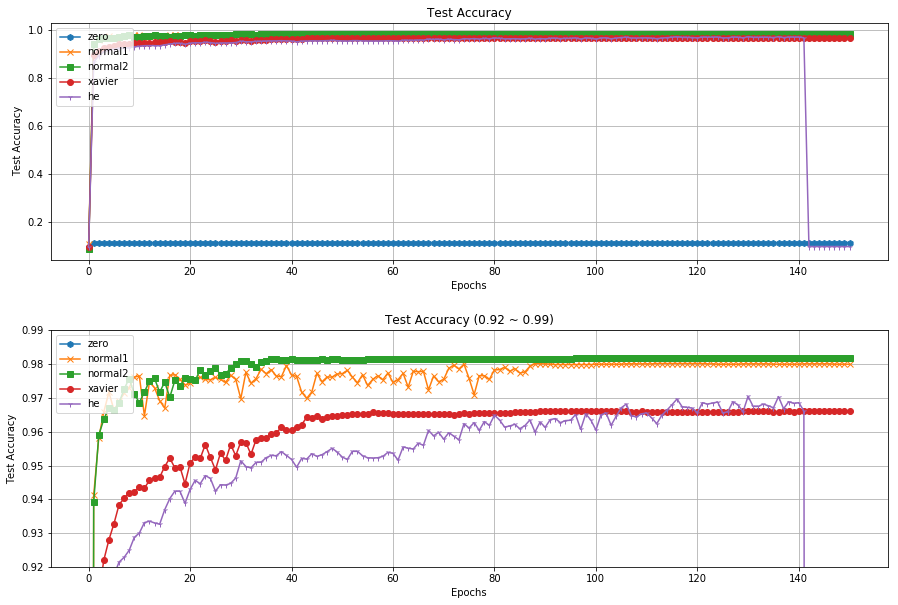

In [7]:
f, axarr = plt.subplots(2, 1, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[0].set_ylabel('Test Accuracy')
axarr[0].set_xlabel('Epochs')
axarr[0].grid(True)
axarr[0].set_title('Test Accuracy')
axarr[0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[1].set_ylabel('Test Accuracy')
axarr[1].set_xlabel('Epochs')
axarr[1].grid(True)
axarr[1].set_ylim(0.92, 0.99)
axarr[1].set_title('Test Accuracy (0.92 ~ 0.99)')
axarr[1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)
plt.show()